<img src="../logo_UTN.svg" align="right" width="200" /> 

# Tarea semanal 3
## Manuel Dieguez

# ¿Que vamos a estudiar en esta tarea?

En esta tarea vamos a analizar el efecto de la cuantizacion en cuanto a la amplitud de la senal. Como nos afecta la discretizacion y la cantidad de bits, asi como un analisis del ruido de la senal.

Vamos a trabajar con una senal de amplitud unitaria afectada por un ruido de distribucion normal, analizada en un DAC del doble de rango.

La idea es poder comparar la senal analogica con la discretizada y analizar el ruido de cuantificacion generado

In [56]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from signal_generator import *

In [57]:
## Primero definamos nuestras variables

Vp = 1     # Amplitud de la senoidal
Vdc = 0    # Valor medio de la senoidal
fs = 1000  # Frecuencia de sampleo de la senoidal
N = fs      ## IMPORTANTE PARA VER LA DISTRIBUCION DE PROBABILIDAD
f = fs/N   # Frecuencia de la senoidal
fase = 0   # fase de la senoidal

# Parametros del ADC
bits = 4
Vref = 2*Vp
num_pasos = 2**(bits) + 1
q = 2*Vref/(num_pasos -1)  ## Valor del paso del ADC en Volts

print(f"\n\nNuestro ADC tiene un rango de {-Vref} a {Vref} y es de {bits:.0f} bits, dandonos un total de {num_pasos} pasos y \
un paso de cuantizacion q de {q:.4f}V \nPara calcular q tomamos que la cantidad de pasos es 2**(bits) + 1 por lo que explicaremos en\
la seccion de Discretizacion \n\n")



Nuestro ADC tiene un rango de -2 a 2 y es de 4 bits, dandonos un total de 17 pasos y un paso de cuantizacion q de 0.2500V 
Para calcular q tomamos que la cantidad de pasos es 2**(bits) + 1 por lo que explicaremos enla seccion de Discretizacion 




La media del ruido es: 0.000759
La varianza del ruido es: 0.004983


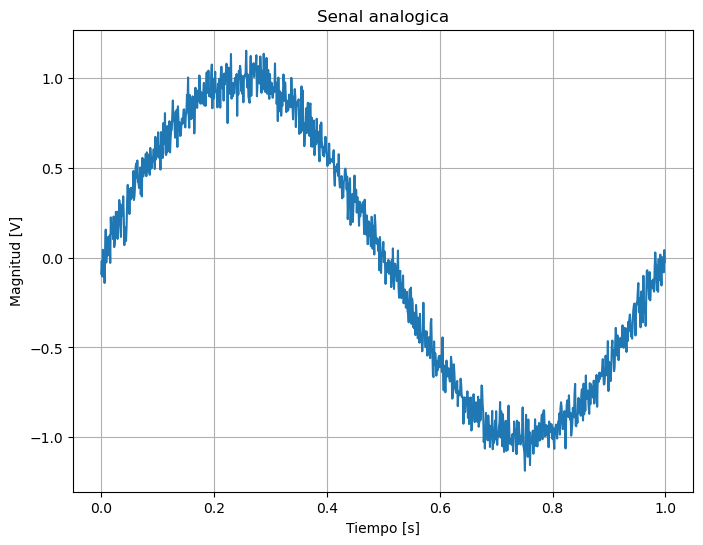

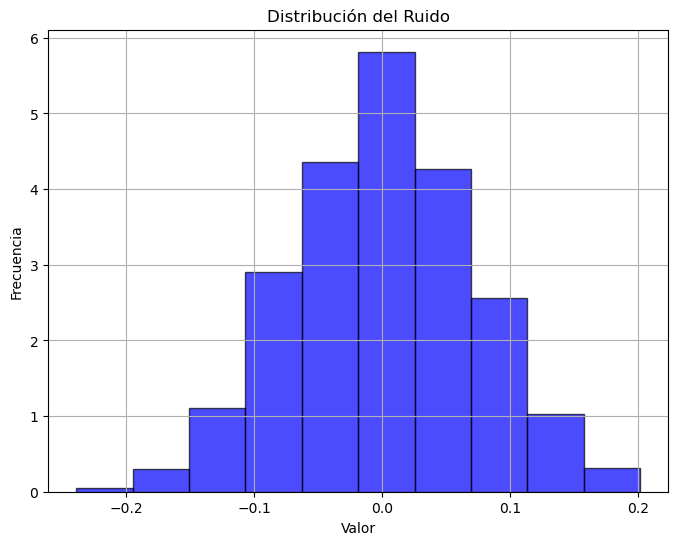

In [58]:
## Nuestro generador de senal va a generar nuestra senal discreta muestreada a 
## fs pero sin cuantizar su ampltiud
[t,x_analogica]   = signal_gen(Vp, Vdc, f, fase, N, fs)
## Ahora agregamos ruido a nuestra senal, ruido normal de varianza q**2/12
n = np.random.normal(0, q/np.sqrt(12) ,len(t))
varianza = np.var(n, ddof = 1)
media   = np.mean(n)
print(f'La media del ruido es: {media:.6f}')
print(f'La varianza del ruido es: {varianza:.6f}')
x = x_analogica + n

plt.figure(1,figsize=(8,6))
plt.title("Senal analogica")
plt.plot(t,x)
plt.ylabel("Magnitud [V]")
plt.xlabel("Tiempo [s]")
plt.grid()
plt.show()

## Hacemos un histograma del ruido para verificar su distribucion
plt.figure(4, figsize=(8,6))
plt.hist(n, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución del Ruido')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Discretrizacion

Para discretizar la senal se penso en principio, en pasar toda la senal al rango positivo sumandole +Vref y aplicando la siguiente ecuacion a partir de una regla de 3 simples y redondeando el resultado

$ x\_disc = \Large \frac{x * 2*Vref}{num\_pasos-1}$

De esta forma tenemos en cuenta que la cantidad de pasos totales son $ 2^{bits} - 1$, pero no nos permite usar el rango de en su totalidad, ya que $V_{ref}$ o $-V_{ref}$ deberian quedar excluidas. A efectos de esta paractica, hacemos que el ADC tenga un paso extra para contemplar ambos valores y hacemos un redondeo directo por el paso de cuantizacion q.

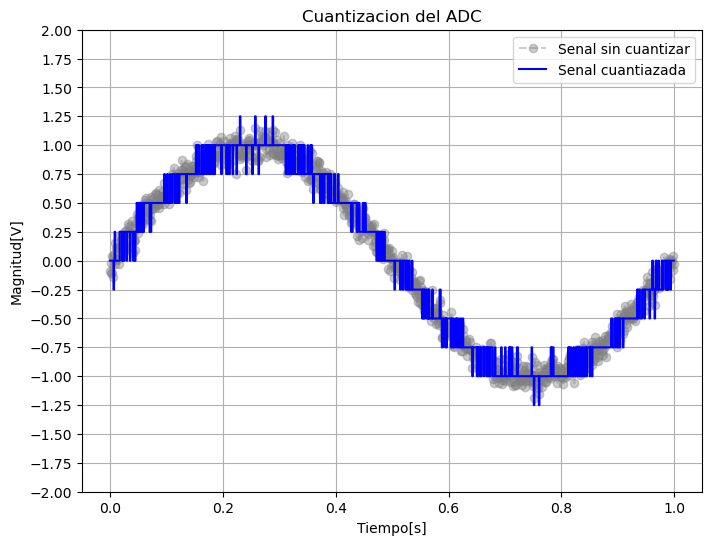

In [59]:
x_disc = np.round(x/q)*q 

plt.figure(2, figsize=(8,6))
plt.plot(t,x, "o--", color = 'grey', alpha=0.4  ,label = 'Senal sin cuantizar')
plt.step(t,x_disc,where = 'post' , color = 'blue' ,label = 'Senal cuantiazada')
plt.title("Cuantizacion del ADC")
## Para mostrar los valores discretos 
grid_levels = np.linspace(-Vref, Vref, num_pasos) 
plt.yticks(grid_levels)
plt.xlabel("Tiempo[s]")
plt.ylabel("Magnitud[V]")
plt.legend()        # Para que muestre los labels
plt.grid()
plt.show()


## Analisis del error

Esta cuantizacion de la senal trae la introduccion de un "error", el error de cuantizacion.
Esto se debe a la diferencia del valor real de la senal contra el valor de lectura del ADC.
Vamos a graficarlo y analizarlo

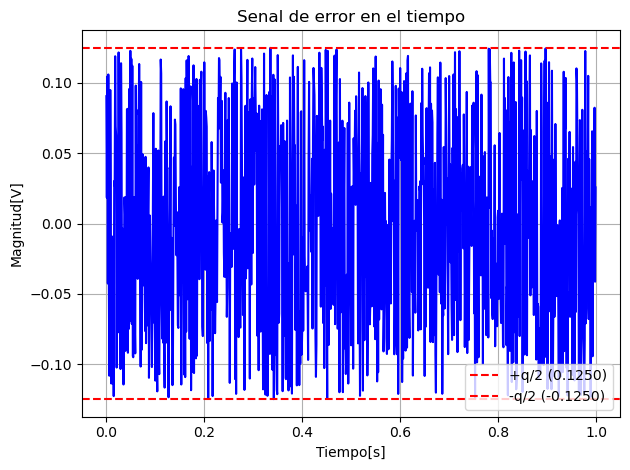

In [60]:
# ## Pasamos a realizar el analisis estadistico del error
e = x_disc - x

# Ploteamos el error y verificamos que se encue
plt.figure(3)
plt.plot(t, e, color = 'blue')
plt.axhline(q/2, color = "red", linestyle = '--', label = f"+q/2 ({q/2:.4f})")
plt.axhline(-q/2, color = "red", linestyle = '--', label = f"-q/2 ({-q/2:.4f})")
plt.title("Senal de error en el tiempo")
plt.xlabel("Tiempo[s]")
plt.ylabel("Magnitud[V]")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

Verificamos que el error esta acotado entre [-q/2;q/2], comprobando lo visto en la teoria

A continuacion, realizamos un breve analisis estadistico de la senal

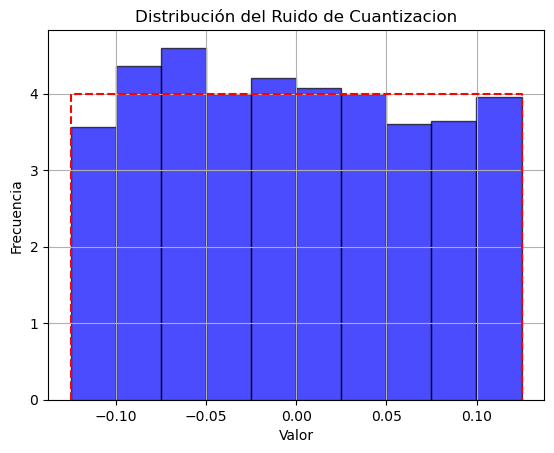

La media del ruido de cuantizacion es: 0.000759
La varianza del ruido de cuantizacion es: 0.004983


In [61]:
## Histograma de la senal

plt.figure(4)
plt.hist(e, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, 1/q, 1/q, 0]), '--r' )
plt.title('Distribución del Ruido de Cuantizacion')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

varianza_e = np.var(e, ddof = 1)
media_e   = np.mean(e)
print(f'La media del ruido de cuantizacion es: {media:.6f}')
print(f'La varianza del ruido de cuantizacion es: {varianza:.6f}')

Verificando que podemos aproximarlo con una distribucion uniforme

##       Comparacion con un ADC de 8 y 16 bits

Vamos a repetir la experiencia con un ADC de 8 bits y otro de 16, vamos a mantener la misma senal analogica pero variamos el ruido

In [62]:
bits = np.array([4, 8, 16])
num_pasos = np.exp2(bits)+1
q = 2*Vref/(num_pasos -1)  ## Valor del paso del ADC en Volts

print(f"\n\nAgregamos dos ADC que tienen un rango de {-Vref}V a {Vref}V y es de {bits[0]:.0f} y {bits[1]:.0f} bits, dandonos un total de {num_pasos} pasos y \
un paso de cuantizacion q de {q[0]:.6f}V y {q[1]:.6f}V respectivamente\n\n")




Agregamos dos ADC que tienen un rango de -2V a 2V y es de 4 y 8 bits, dandonos un total de [1.7000e+01 2.5700e+02 6.5537e+04] pasos y un paso de cuantizacion q de 0.250000V y 0.015625V respectivamente




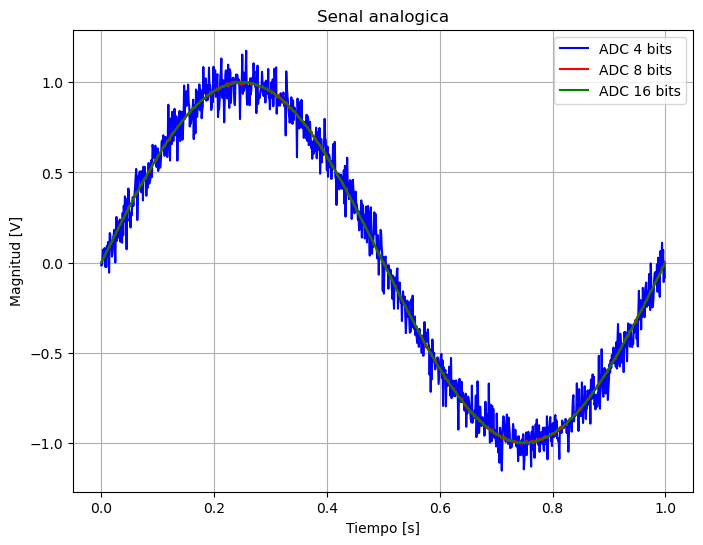

Vemos como el ruido al disminuir el paso de cuantizacion, tambien lo disminuimos, a efectos de esta practica


In [63]:
n = np.zeros((len(q), len(t)))
for i in range(len(q)):
    n[i] = np.random.normal(0, q[i]/np.sqrt(12), len(t))

x_4 = x_analogica + n[0,:]
x_8 = x_analogica + n[1,:]
x_16 = x_analogica + n[2,:]


plt.figure(6, figsize=(8,6))
plt.title("Senal analogica")
plt.plot(t,x_4, label = "ADC 4 bits", color = 'blue')
plt.plot(t,x_8, label = "ADC 8 bits", color = 'red')
plt.plot(t,x_16, label = "ADC 16 bits", color = 'green')
plt.ylabel("Magnitud [V]")
plt.xlabel("Tiempo [s]")
plt.legend()
plt.grid()
plt.show()
print("Vemos como el ruido al disminuir el paso de cuantizacion, tambien lo disminuimos, a efectos de esta practica")

### Comparacion de resultados de la discretizacion

Vamos a comparar los resultados de discretizacion y como se aproxima a la senal analogica a medidad que aumentamos los bits

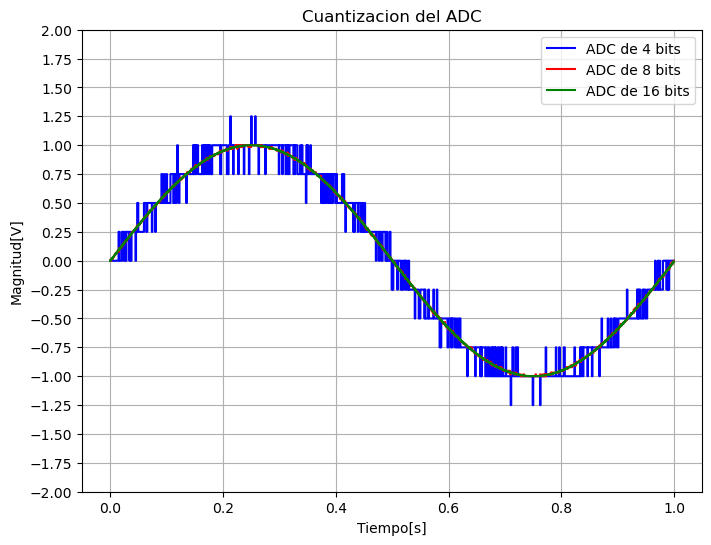

In [64]:
x_disc_4 = np.round(x_4/q[0])*q[0]
x_disc_8 = np.round(x_8/q[1])*q[1]
x_disc_16 = np.round(x_16/q[2])*q[2]

plt.figure(7, figsize=(8,6))
#plt.plot(t,x, "o--", color = 'grey', alpha=0.4  ,label = 'Senal sin cuantizar')
plt.step(t,x_disc_4,where = 'post' , color = 'blue' ,label = 'ADC de 4 bits')
plt.step(t,x_disc_8,where = 'post' , color = 'red' ,label = 'ADC de 8 bits')
plt.step(t,x_disc_16,where = 'post' , color = 'green' ,label = 'ADC de 16 bits')
plt.title("Cuantizacion del ADC")
## Para mostrar los valores discretos 
grid_levels = np.linspace(-Vref, Vref, int(num_pasos[0])) 
plt.yticks(grid_levels)
plt.xlabel("Tiempo[s]")
plt.ylabel("Magnitud[V]")
plt.legend()        # Para que muestre los labels
plt.grid()
plt.show()

Se ve claramente el efecto del aumento de bits sobre la precision en la representacion de la senal

Analicemos el error de cuantizacion de estas senales y sus distribuciones

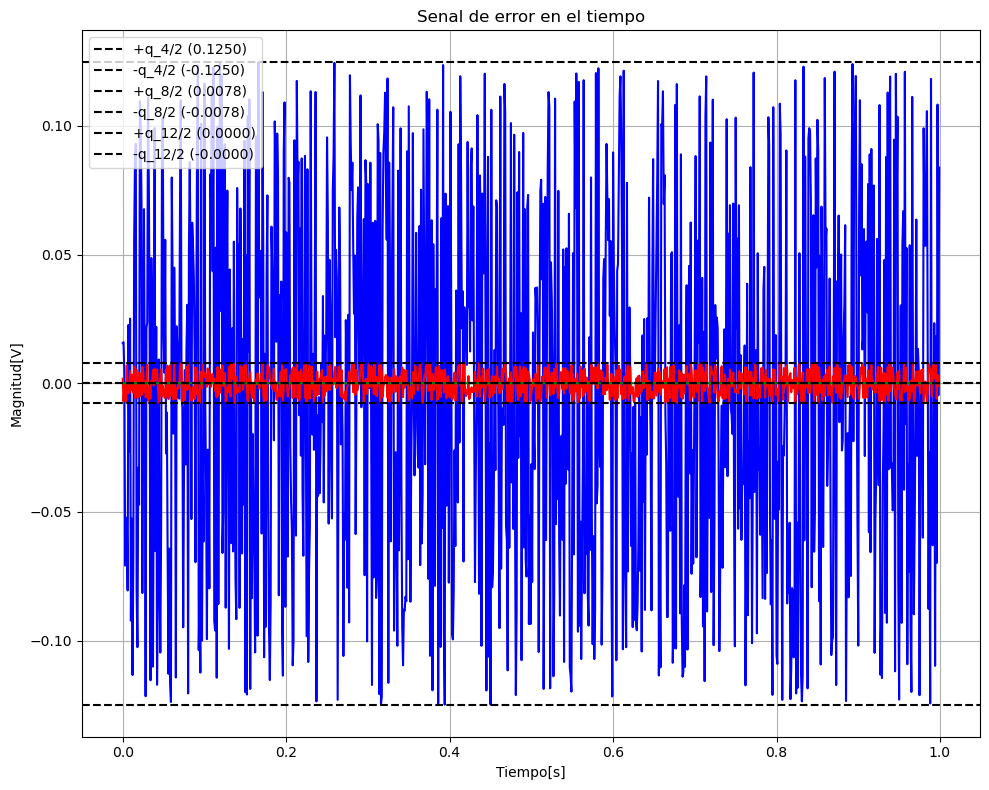

In [69]:
# ## Pasamos a realizar el analisis estadistico del error
e_4  = x_disc_4 - x_4
e_8  = x_disc_8 - x_8
e_16 = x_disc_16 - x_16

# Ploteamos el error y verificamos que se encue
plt.figure(3, figsize=(10,8))
plt.plot(t, e_4, color = 'blue')
plt.plot(t, e_8, color = 'red')
plt.plot(t, e_16, color = 'green')
for i in range(len(q)):
    plt.axhline(q[i]/2, color = 'k', linestyle = '--', label = f"+q_{(i+1)*4}/2 ({q[i]/2:.4f})")
    plt.axhline(-q[i]/2, color = 'k', linestyle = '--', label = f"-q_{(i+1)*4}/2 ({-q[i]/2:.4f})")
plt.title("Senal de error en el tiempo")
plt.xlabel("Tiempo[s]")
plt.ylabel("Magnitud[V]")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

Asi corroborramos una de las ventajas de aumentar la cantidad de bits de sampleo, la baja del ruido de cuantizacion.
Para 16 bits el ruido es despreciable contra los otros ADC